# Representacion estructurada de Paises de Africa

## Entendimiento y Preprocesamiento de datos

In [200]:
%pip install scikit-learn matplotlib pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [201]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# Cargar los datos
africa_countries = pd.read_csv('africa_countries.csv')
africa_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country Code                                                      61 non-null     object 
 1   Country Name                                                      61 non-null     object 
 2   Central government, Fiscal Balance (% of GDP) 2019                61 non-null     float64
 3   Current account balance (As % of GDP) 2019                        61 non-null     float64
 4   Exports of goods and services (% of GDP) 2019                     58 non-null     float64
 5   Imports of goods and services (% of GDP) 2019                     58 non-null     float64
 6   Inflation, consumer prices (annual %) 2019                        61 non-null     float64
 7   Gross capital formation (% of GDP) 20

Al observar que la columna Gini Index 2019 tiene mas del 90% de valores nulos se ha optado por eliminar esta columna de la base de datos.

In [203]:
# Eliminar la columna 'Gini Index 2019'
africa_countries.drop(columns=['Gini Index 2019'], inplace=True)

# Eliminar filas con valores nulos
africa_countries.dropna(inplace=True)

### Descripción de la base de datos

La base de datos contiene **61 países** y **22 variables** (20 numéricas y 2 categóricas). A continuación, se explican las variables utilizadas en el análisis:

1. **Gross National Income Per Capita (2017 PPP$)**: Ingreso Nacional Bruto per cápita ajustado por Paridad de Poder Adquisitivo (PPP$ de 2017). Es un indicador clave de la capacidad económica per cápita, crucial para evaluar la riqueza y el nivel de vida promedio en cada país.
2. **Human Development Index (value)**: Índice de Desarrollo Humano, que mide el bienestar general de un país en términos de calidad de vida, educación y salud, permitiendo comparar el desarrollo entre naciones.
3. **Inequality-adjusted Human Development Index (value)**: Índice de Desarrollo Humano ajustado por desigualdad, que ofrece una perspectiva crítica al ajustar por la distribución desigual del ingreso, educación y salud.
4. **Life Expectancy at Birth (years)**: Esperanza de vida al nacer, un indicador clave del bienestar general de la población, vinculando la calidad de vida con los resultados económicos.
5. **Labour force participation rate, female (% ages 15 and older)**: Tasa de participación laboral femenina (% de mujeres mayores de 15 años), reflejando la inclusión de las mujeres en la economía de cada país.
6. **Labour force participation rate, male (% ages 15 and older)**: Tasa de participación laboral masculina (% de hombres mayores de 15 años), proporcionando una perspectiva del grado de participación masculina en la economía.
7. **Gross domestic product, current prices (current US$) 2019**: Producto Interno Bruto en términos absolutos (precios corrientes en US$), un indicador del tamaño económico del país.
8. **Real GDP growth (annual %) 2019**: Crecimiento del PIB real ajustado por inflación, permitiendo identificar tendencias de crecimiento o recesión económica.
9. **Current account balance (As % of GDP) 2019**: Balanza por cuenta corriente como porcentaje del PIB, midiendo el equilibrio entre exportaciones e importaciones.
10. **Exports of goods and services (% of GDP) 2019**: Exportaciones de bienes y servicios como porcentaje del PIB, un indicador clave del grado de dependencia económica en las exportaciones.
11. **Imports of goods and services (% of GDP) 2019**: Importaciones de bienes y servicios como porcentaje del PIB, reflejando la dependencia de bienes y servicios extranjeros.
12. **Inflation, consumer prices (annual %) 2019**: Inflación anual medida por los precios al consumidor, un indicador de la estabilidad económica y confianza dentro del país.
13. **Gross capital formation (% of GDP) 2019**: Formación bruta de capital como porcentaje del PIB, que mide la inversión en activos productivos, clave para el crecimiento a largo plazo.
14. **Final consumption expenditure (% of GDP) 2019**: Consumo final como porcentaje del PIB, que refleja el gasto total en bienes y servicios de la economía interna.
15. **General government final consumption expenditure (% of GDP) 2019**: Gasto final del gobierno general, un indicador de la inversión del gobierno en bienes y servicios para el bienestar social.
16. **Household final consumption expenditure (% of GDP) 2019**: Gasto final de los hogares como porcentaje del PIB, midiendo el comportamiento de consumo de las familias.
17. **Maternal Mortality Ratio (deaths per 100,000 live births)**: Tasa de mortalidad materna, un indicador clave de la calidad del sistema de salud de un país.
18. **Share of seats in parliament, female (% held by women)**: Participación femenina en el parlamento, que mide la inclusión política de las mujeres y su implicación en el desarrollo de políticas inclusivas.
19. **Gini Index (2019)**: Índice de Gini, que mide la desigualdad en la distribución del ingreso dentro de un país, siendo un indicador esencial para analizar la cohesión social y el bienestar general.


In [204]:
# Variables cuantitativas del dataset
quantitative_columns = africa_countries.columns[2:]

# Imputación de valores faltantes con la media (aunque ya se han eliminado las filas con NaN)
imputer = SimpleImputer(strategy='mean')
africa_countries_imputed = imputer.fit_transform(africa_countries[quantitative_columns])

# Escalado de las variables
scaler = StandardScaler()
africa_countries_scaled = scaler.fit_transform(africa_countries_imputed)

Revisando la correlacion de las variables para realizar SVD

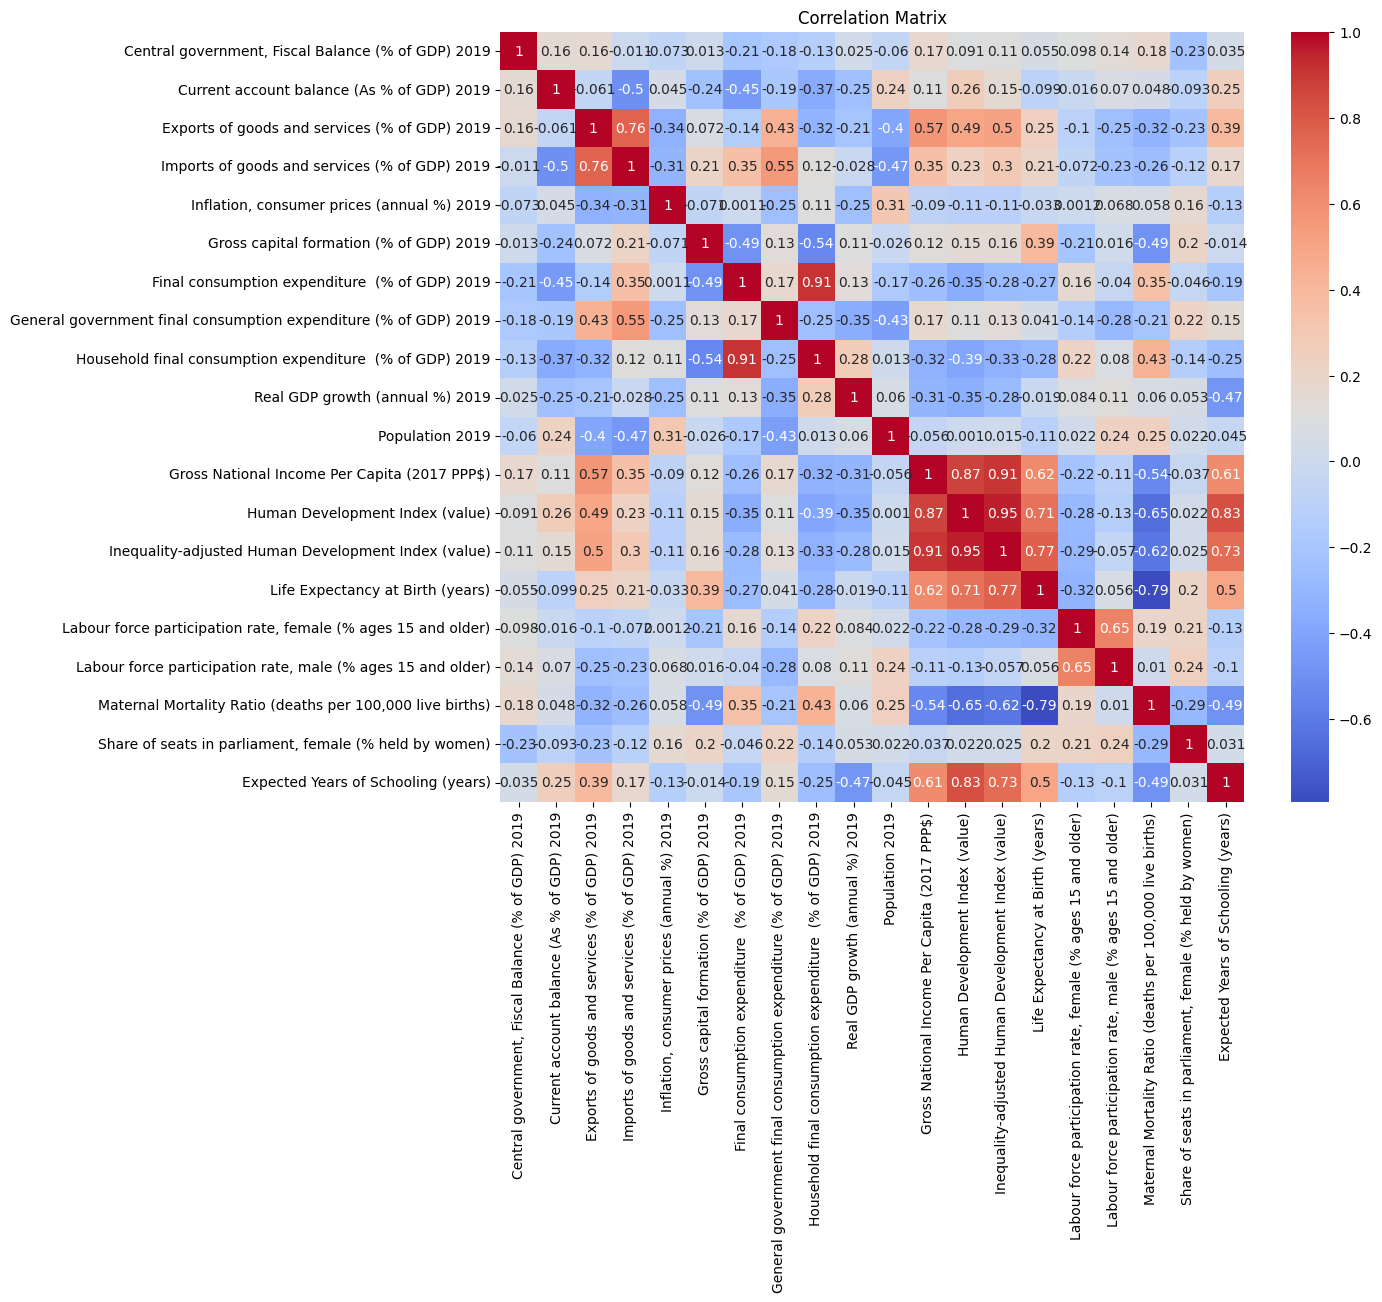

In [205]:
# Matriz de correlación
correlation_matrix = pd.DataFrame(africa_countries_scaled, columns=quantitative_columns).corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Aplicando SVD

Metodo del codo para determinar el numero de componentes

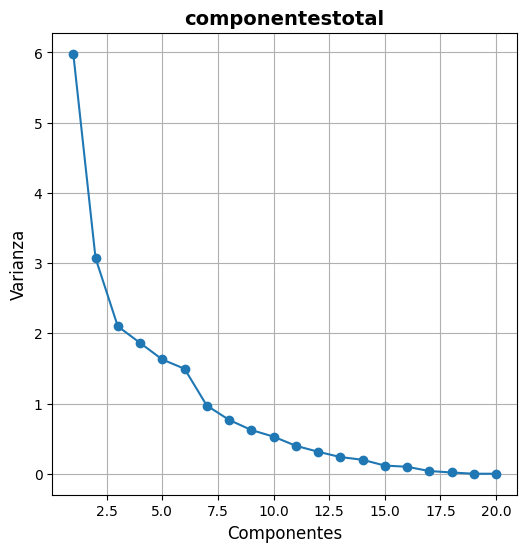

In [206]:
# Aplicar PCA para determinar la varianza explicada por cada componente
pca = PCA()
pca_result = pca.fit(africa_countries_scaled)

# Varianza explicada por cada componente
explained_variance_pca = pca.explained_variance_

# Gráfico de la varianza explicada por componente
plt.figure(figsize=(6, 6))
plt.plot(range(1, len(explained_variance_pca) + 1), explained_variance_pca, marker='o', linestyle='-')
plt.title('componentestotal', fontsize=14, fontweight='bold')
plt.xlabel('Componentes', fontsize=12)
plt.ylabel('Varianza', fontsize=12)
plt.grid(True)
plt.show()

De acuerdo con el gráfico, el punto óptimo para la cantidad de componentes se puede identificar en el punto de inflexión, donde la pendiente comienza a aplanarse significativamente. Observando el gráfico, parece que este punto ocurre alrededor de los 7 componentes, ya que después de estos, la ganancia en varianza explicada disminuye considerablemente.

In [207]:
# Realizar SVD con 7 componentes
components = 7
svd = TruncatedSVD(n_components=components)
svd_result = svd.fit_transform(africa_countries_scaled)

# Crear un DataFrame con los resultados de SVD
svd_df = pd.DataFrame(svd_result, columns=[f'Component {i+1}' for i in range(components)])

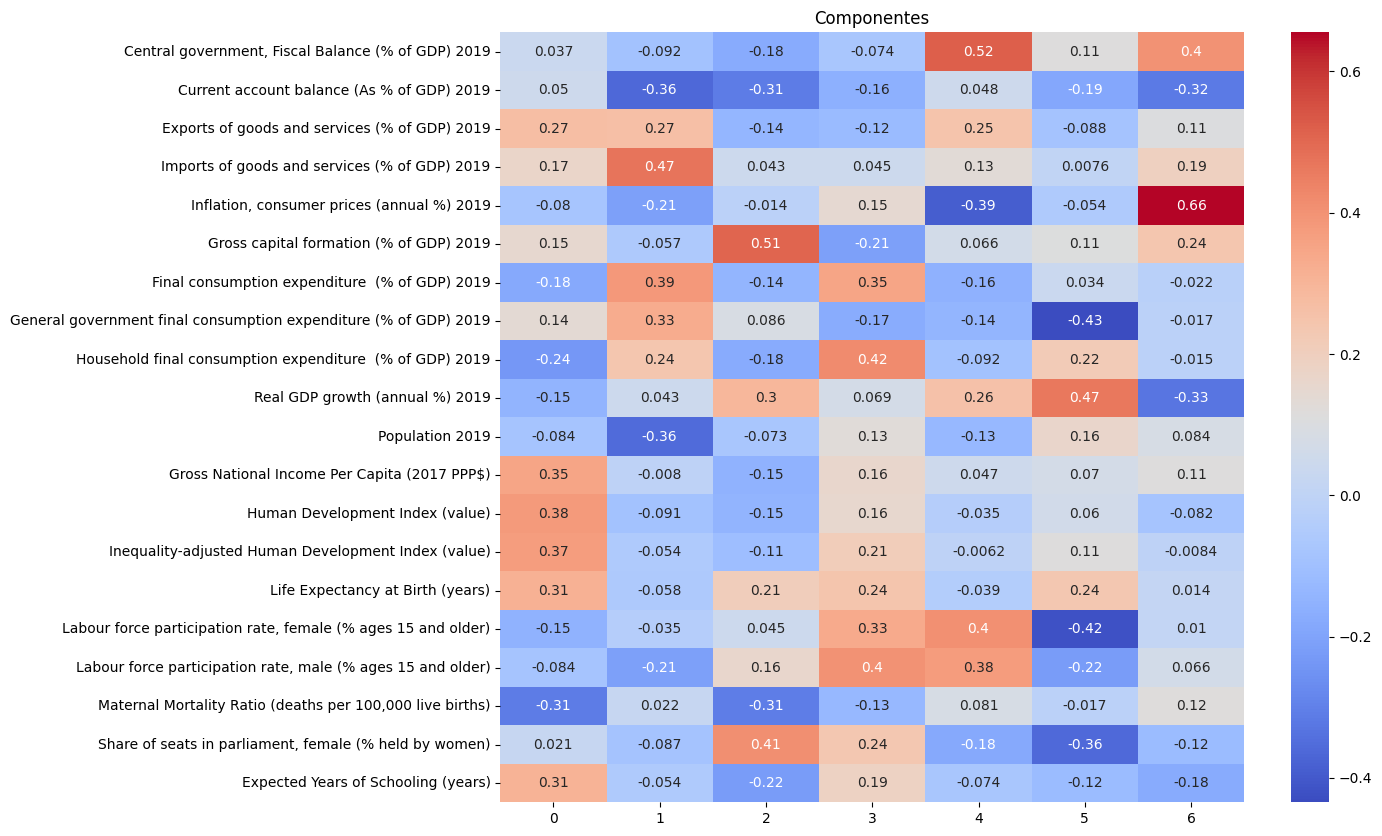

In [208]:
# Pesos de las variables en los componentes
svd_components_df = pd.DataFrame(svd.components_, columns=quantitative_columns).T

# Gráfico de los pesos de las variables en los componentes
plt.figure(figsize=(12, 10))
sns.heatmap(svd_components_df, annot=True, cmap='coolwarm')
plt.title('Componentes')
plt.show()

In [209]:
most_influential_variables = pd.DataFrame({
    f'Component {i+1}': svd_components_df[i].abs().sort_values(ascending=False).index[:5]
    for i in range(7)
})

# Display the top 5 most influential variables for each of the first 7 components
most_influential_variables

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
0,Human Development Index (value),Imports of goods and services (% of GDP) 2019,Gross capital formation (% of GDP) 2019,Household final consumption expenditure (% of...,"Central government, Fiscal Balance (% of GDP) ...",Real GDP growth (annual %) 2019,"Inflation, consumer prices (annual %) 2019"
1,Inequality-adjusted Human Development Index (v...,Final consumption expenditure (% of GDP) 2019,"Share of seats in parliament, female (% held b...","Labour force participation rate, male (% ages ...","Labour force participation rate, female (% age...",General government final consumption expenditu...,"Central government, Fiscal Balance (% of GDP) ..."
2,Gross National Income Per Capita (2017 PPP$),Current account balance (As % of GDP) 2019,Current account balance (As % of GDP) 2019,Final consumption expenditure (% of GDP) 2019,"Inflation, consumer prices (annual %) 2019","Labour force participation rate, female (% age...",Real GDP growth (annual %) 2019
3,"Maternal Mortality Ratio (deaths per 100,000 l...",Population 2019,"Maternal Mortality Ratio (deaths per 100,000 l...","Labour force participation rate, female (% age...","Labour force participation rate, male (% ages ...","Share of seats in parliament, female (% held b...",Current account balance (As % of GDP) 2019
4,Life Expectancy at Birth (years),General government final consumption expenditu...,Real GDP growth (annual %) 2019,Life Expectancy at Birth (years),Real GDP growth (annual %) 2019,Life Expectancy at Birth (years),Gross capital formation (% of GDP) 2019


## Análisis de Componentes Principales (SVD)

A través del análisis de los pesos de las variables en cada uno de los componentes obtenidos, se han identificado las principales variables que influyen en cada componente. Basado en estas variables predominantes, se han asignado nombres representativos para cada componente, los cuales se detallan a continuación:

### **Componente 1: Desarrollo Humano y Calidad de Vida**
Las variables predominantes en este componente son:
- **Índice de Desarrollo Humano (HDI)**
- **Ingreso Nacional Bruto per cápita (GNI)**
- **Esperanza de vida**

Estas variables están relacionadas con aspectos que reflejan el **bienestar humano** y el **desarrollo socioeconómico** de los países, tales como la calidad de vida, la salud y la riqueza.

---

### **Componente 2: Comercio Exterior y Consumo Doméstico**
En este componente destacan las siguientes variables:
- **Importaciones de bienes y servicios**
- **Gasto de consumo final**
- **Cuenta corriente**

Este componente está centrado en las dinámicas del **comercio internacional** y el **gasto interno**, vinculando el intercambio comercial con el consumo en los países analizados.

---

### **Componente 3: Inversión, Participación y Crecimiento**
Las principales variables influyentes son:
- **Formación bruta de capital**
- **Participación femenina en el parlamento**
- **Crecimiento del PIB**

Este componente está relacionado con la **inversión pública y privada**, la **participación política**, especialmente de las mujeres, y el **crecimiento económico**.

---

### **Componente 4: Consumo Doméstico y Mercado Laboral**
Este componente se caracteriza por las siguientes variables:
- **Gasto final de los hogares**
- **Tasa de participación laboral femenina y masculina**
- **Esperanza de vida**

Refleja el comportamiento del **consumo doméstico** y la participación de la **fuerza laboral**, destacando la relación entre el bienestar de los hogares y el empleo.

---

### **Componente 5: Política Fiscal y Estabilidad Económica**
Las variables más influyentes en este componente son:
- **Balance fiscal del gobierno**
- **Inflación**
- **Tasa de participación laboral femenina**

Este componente captura la influencia de la **política fiscal** y la **estabilidad económica**, centrándose en la gestión de los recursos del gobierno y la estabilidad de precios.

---

### **Componente 6: Desempeño Económico y Política Pública**
En este componente, las variables predominantes incluyen:
- **Crecimiento del PIB**
- **Gasto final del gobierno**
- **Participación femenina en el parlamento**

Este componente refleja el **desempeño económico** en términos de crecimiento y gasto público, junto con aspectos de **política pública** relacionados con la igualdad de género en la política.

---

### **Componente 7: Inflación y Finanzas Públicas**
Las variables clave en este componente son:
- **Inflación**
- **Balance fiscal del gobierno**
- **Formación bruta de capital**

Este componente pone énfasis en la **inflación** y las **finanzas públicas**, destacando la estabilidad económica a través del control del gasto y la inversión.

---

Este análisis permite una comprensión más profunda de los principales factores que afectan el comportamiento económico y social de los países analizados, agrupados en los diferentes componentes obtenidos mediante SVD.

In [210]:
# Agregar los nombres de los países al DataFrame de los resultados de SVD
svd_df.insert(0, 'Country Name', africa_countries['Country Name'].values)

# Nombres propuestos para los componentes
component_names = [
    'Desarrollo Humano y Calidad de Vida', 
    'Comercio Exterior y Consumo Doméstico',
    'Inversión, Participación y Crecimiento',
    'Consumo Doméstico y Mercado Laboral',
    'Política Fiscal y Estabilidad Económica',
    'Desempeño Económico y Política Pública',
    'Inflación y Finanzas Públicas'
]

# Renombrar las columnas correspondientes a los componentes
svd_df.columns = ['Pais'] + component_names

# Visualizar los resultados finales de SVD
svd_df

,Pais,Desarrollo Humano y Calidad de Vida,Comercio Exterior y Consumo Doméstico,"Inversión, Participación y Crecimiento",Consumo Doméstico y Mercado Laboral,Política Fiscal y Estabilidad Económica,Desempeño Económico y Política Pública,Inflación y Finanzas Públicas
0,Angola,0.547740,-3.183506,-0.101779,-0.102043,0.399305,-1.972490,1.487288
1,Burundi,-2.740107,-0.228716,0.219541,1.622039,-2.496380,-3.644466,1.244077
2,Benin,-1.234164,0.546840,-0.316793,-0.794320,1.430547,0.901547,-0.196992
3,Burkina Faso,-0.731461,1.113075,0.531915,-3.162815,-0.416301,0.481854,-0.457290
4,Botswana,2.911606,-1.644914,-0.823532,-1.210367,1.496025,-0.697374,-0.264612
5,Cote d'Ivoire,-1.246440,-0.855130,-0.145140,-0.937526,1.530433,0.565434,-0.827482
6,Cameroon,-0.474672,-1.446949,-0.180825,0.311638,1.001031,-0.595657,-0.880482
7,"Congo, Rep.",2.026775,-0.204195,-1.020950,-2.809909,0.665525,-1.109913,-0.978411
8,Comoros,-0.361101,-0.100272,-0.987964,-0.396992,-1.107276,1.133104,-0.834096
9,Cabo Verde,2.879914,0.963340,1.153780,0.270158,0.571369,0.544381,0.192985


In [211]:
# Guardar los resultados de SVD en un archivo CSV
svd_df.to_csv('africa_countries_svd.csv', index=False)

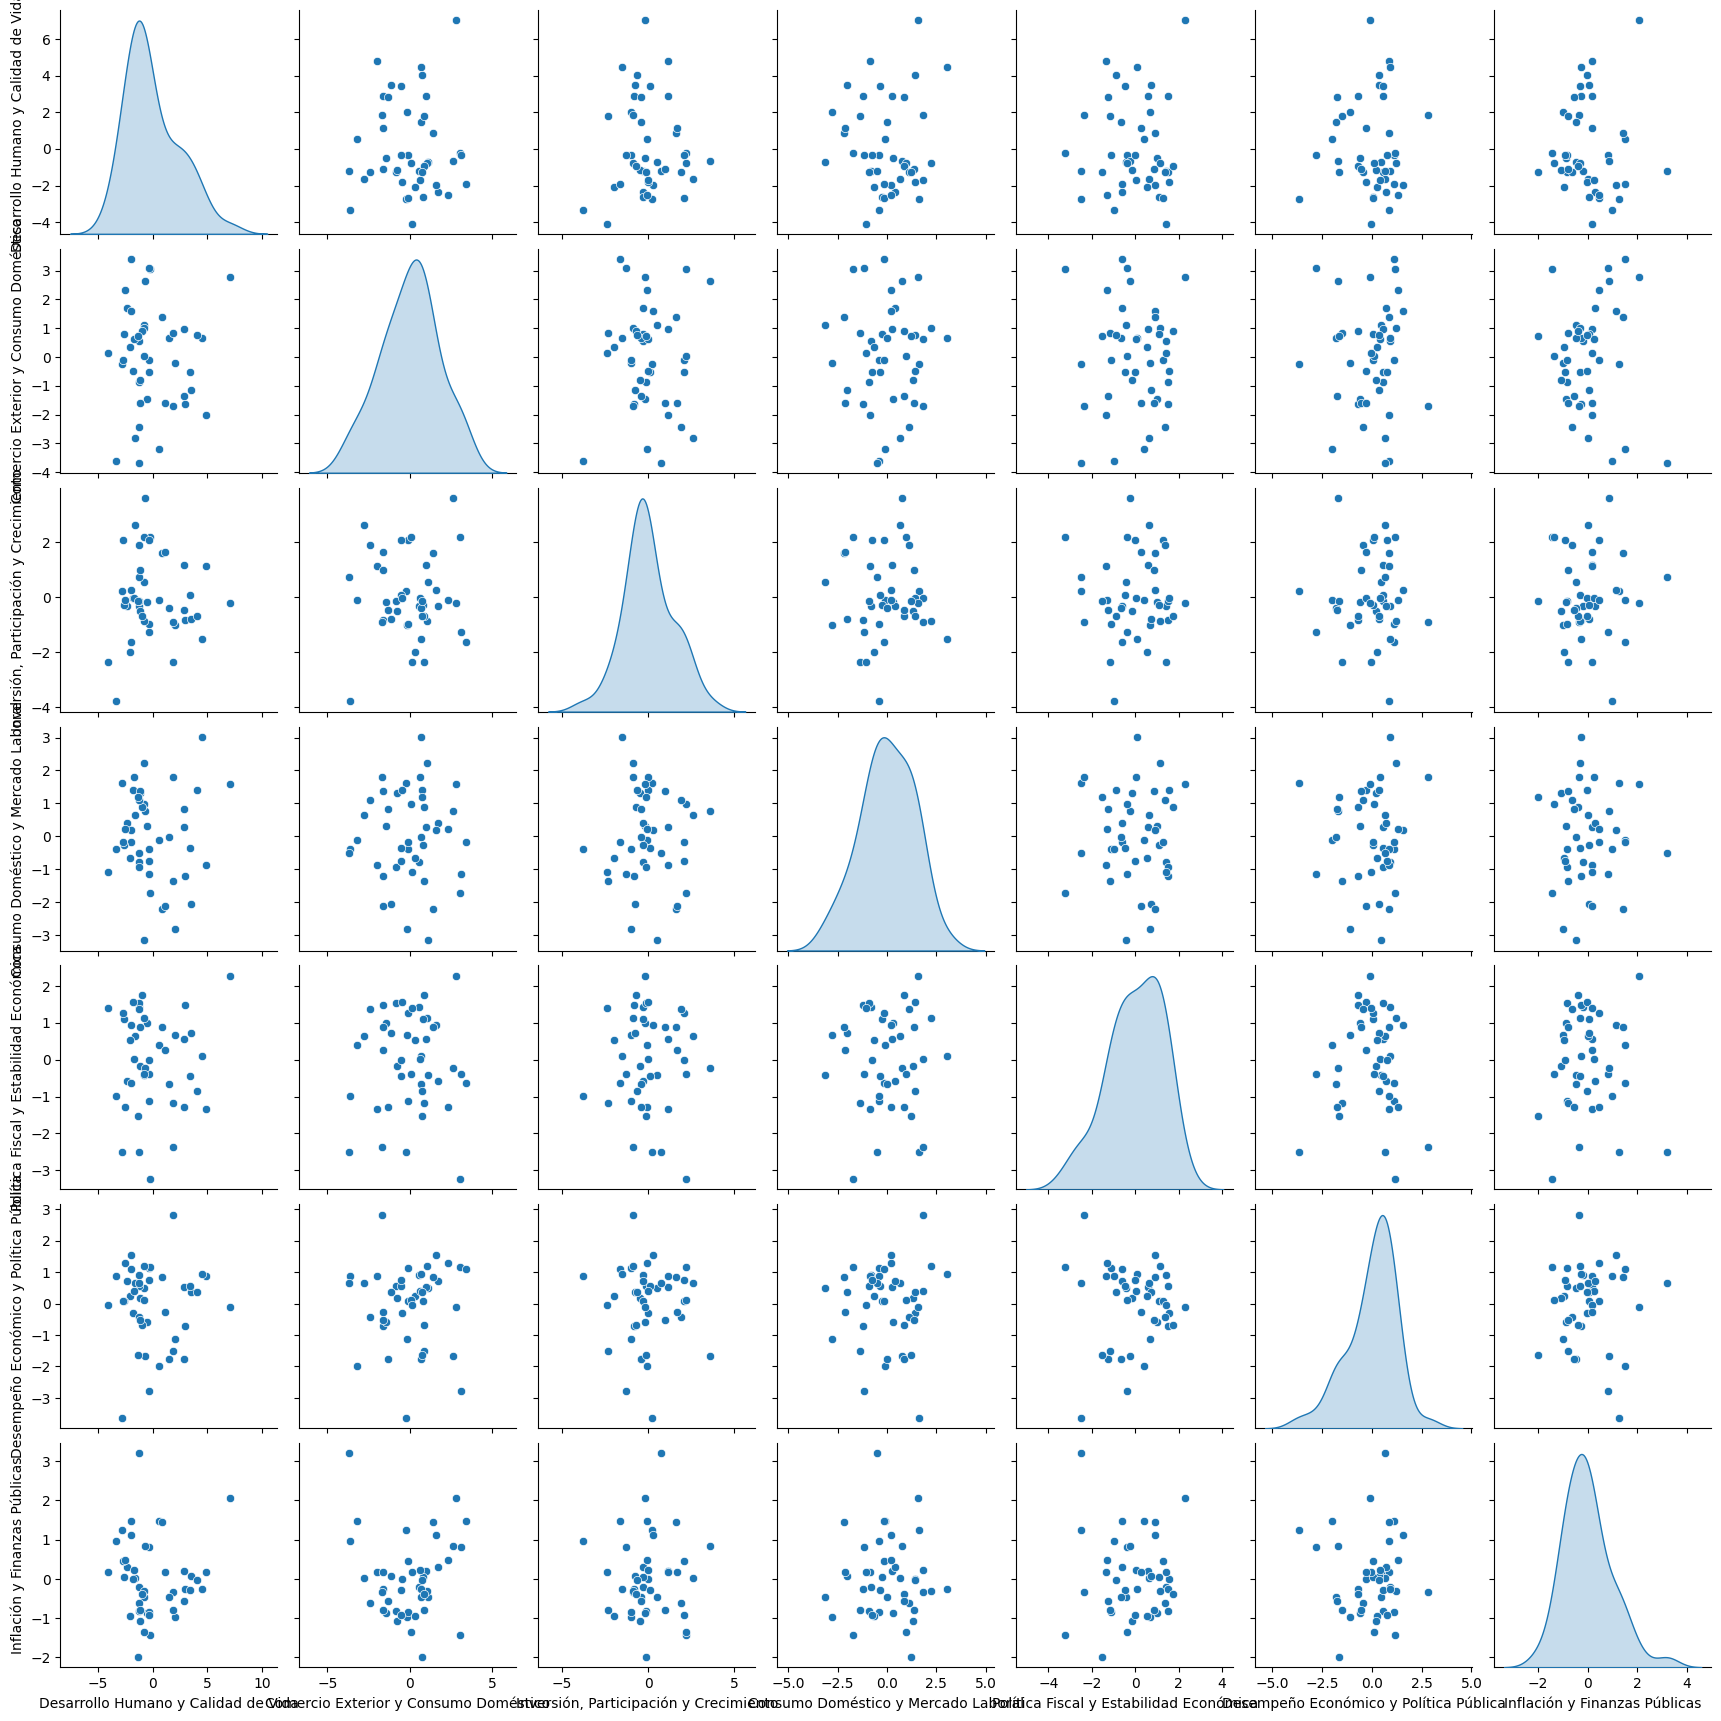

In [212]:
# Pair plot de los componentes
sns.pairplot(svd_df, diag_kind='kde')